# Технологии искусственного интеллекта

© Петров М.В., старший преподаватель кафедры суперкомпьютеров и общей информатики, Самарский университет

## Лекция 7. Перцептрон

### Содержание

1. [Введение](#7.1-Введение)
2. [Нейронная сеть](#7.2-Нейронная-сеть)
3. [Перцептрон](#7.3-Перцептрон)
4. [Back propagation - алгоритм обучения по методу обратного распространения](#7.4-Back-propagation--алгоритм-обучения-по-методу-обратного-распространения)
5. [Датасет `Rain in Australia`](#7.5-Датасет-Rain-in-Australia)
6. [Подготовка данных](#7.6-Подготовка-данных)
7. [Классификация](#7.7-Классификация)

### 7.1 Введение

Источники:
 - [Нейронная сеть](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C)
 - [Структура и принцип работы полносвязных нейронных сетей](https://proproprogs.ru/neural_network/struktura-i-princip-raboty-polnosvyaznyh-neyronnyh-setey), [YouTube](https://www.youtube.com/watch?v=VqChpNNYZ8Q&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh)
 - [Персептрон - возможности классификации образов, задача XOR](https://proproprogs.ru/neural_network/perseptron-vozmozhnosti-klassifikacii-obrazov-zadacha-xor), [YouTube](https://www.youtube.com/watch?v=t9QfcFNkG58&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh)
 - [Back propagation - алгоритм обучения по методу обратного распространения](https://proproprogs.ru/neural_network/back-propagation-algoritm-obucheniya-po-metodu-obratnogo-rasprostraneniya), [YouTube](https://www.youtube.com/watch?v=UXB9bFj-UA4&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh)
 - Тарик Рашид, "Создаем нейронную сеть"
 - [Perceptron @ sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
 - [MLPClassifier @ sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


#### Краткая история

 - 1943 г. Уоррен Мак-Каллок и Уолтер Питтс формализуют понятие нейронной сети в фундаментальной статье о логическом исчислении идей и нервной активности. Они выдвинули предположение, что нейроны можно упрощённо рассматривать как устройства, оперирующие двоичными числами, и назвали эту модель "пороговой логикой". Подобно своему биологическому прототипу нейроны Мак-Каллока-Питтса были способны обучаться путём подстройки параметров, описывающих синаптическую проводимость. Исследователи предложили конструкцию сети из электронных нейронов и показали, что подобная сеть может выполнять практически любые вообразимые числовые или логические операции. Мак-Каллок и Питтс предположили, что такая сеть в состоянии также обучаться, распознавать образы, обобщать, т.е. обладает всеми чертами интеллекта.
 - 1948 г. Опубликована книга Н. Винера о кибернетике. Основной идеей стало представление сложных биологических процессов математическими моделями.
 - 1949 г. Дональд Олден Хебб предлагает первый алгоритм обучения. Он первым предположил, что обучение заключается в первую очередь в изменениях силы синаптических связей. Теория Хебба считается типичным случаем самообучения, при котором испытуемая система спонтанно обучается выполнять поставленную задачу без вмешательства со стороны экспериментатора.
 - 1958 г. Фрэнк Розенблатт изобретает однослойный перцептрон и демонстрирует его способность решать задачи классификации. Перцептрон использовали для распознавания образов, прогнозирования погоды.
 - 1963 г. В Институте проблем передачи информации АН СССР Александром Павловичем Петровым проводится исследование задач, «трудных» для перцептрона.
 - 1969 г. Марвин Ли Минский публикует формальное доказательство ограниченности перцептрона и показывает, что он не способен решать некоторые задачи (проблема «чётности» и «один в блоке»), связанные с инвариантностью представлений. Второй важной проблемой было то, что компьютеры не обладали достаточной вычислительной мощностью, чтобы эффективно обрабатывать огромный объём вычислений, необходимый для больших нейронных сетей.
 - 1974 г. Пол Вербос и Александр Иванович Галушкин А. И. одновременно изобретают алгоритм обратного распространения ошибки для обучения многослойных перцептронов.
 - 1975 г. Кунихико Фукусима представляет когнитрон &ndash; самоорганизующуюся сеть, предназначенную для инвариантного распознавания образов, но это достигается только при помощи запоминания практически всех состояний образа.
 - 1982 г. Джон Джозеф Хопфилд показал, что нейронная сеть с обратными связями может представлять собой систему, минимизирующую энергию (сеть Хопфилда). Теуво Кохоненом представлены модели сети, обучающейся без учителя (нейронная сеть Кохонена), решающей задачи кластеризации, визуализации данных (самоорганизующаяся карта Кохонена) и другие задачи предварительного анализа данных.
 - 1986 г. Дэвидом Румельхартом, Джеффри Хинтоном и Рональдом Вильямсом, а также независимо и одновременно С.И. Барцевым и В.А. Охониным, развит метод обратного распространения ошибки.
 - 1989 г. Ян Лекун представил первую сверточную нейронную сеть (LeNet), способную распознавать рукописные цифры с хорошей скоростью и точностью распознавания. [Демонстрация работы](https://www.youtube.com/watch?v=FwFduRA_L6Q).
 - 2007 г. Джеффри Хинтоном в университете Торонто созданы алгоритмы глубокого обучения многослойных нейронных сетей. Хинтон при обучении нижних слоёв сети использовал ограниченную машину Больцмана (RBM — Restricted Boltzmann Machine). По Хинтону необходимо использовать много примеров распознаваемых образов (например, множество лиц людей на разных фонах). После обучения получается готовое быстро работающее приложение, способное решать конкретную задачу (например, осуществлять поиск лиц на изображении). 

### 7.2 Нейронная сеть

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Neuron-rus.svg/1920px-Neuron-rus.svg.png" width="600" title="Структура нейрона"/>
  <p style="text-align: center">
    Рисунок 1 &ndash; Структура нейрона
  </p>
</div>

Мозг состоит из большого количества нейронов, связанных между собой дендритами и аксонами. Дендриты - это отростки, по которым нервные импульсы передаются к телу нейрона. Эти отростки сильно ветвятся. У нейрона может быть несколько дендритов. Аксон - это отросток, по которому импульсы передаются от тела клетки.

Фрэнк Розенблатт предложил перцептрон, схема которого вдохновлена биологическим прототипом:

<div align="center">
  <img src="images/perceptron_1.svg" width="600" title="Перцептрон"/>
  <p style="text-align: center">
    Рисунок 2 &ndash; Перцептрон
  </p>
</div>

#### Полносвязная нейронная сеть прямого распространения

<div align="center">
  <img src="images/full_connected_network.svg" width="1000" title="Полносвязная нейронная сеть"/>
  <p style="text-align: center">
    Рисунок 3 &ndash; Полносвязная нейронная сеть
  </p>
</div>

 - Каждый нейрон текущего слоя связан с каждым нейроном следующего слоя.
 - Прямое распространение - сигнал распространяется от входного слоя к выходному, не образуя обратных связей.  

Каждая связь между нейронами имеет определенный вес $\omega_{ij}$ - весовой коэффициент, связанный с сигналом, который передается от $i$-го нейрона текущего слоя к $j$-му нейрону следующего слоя:  

<div align="center">
  <img src="images/full_connected_network_2.svg" width="1000" title="Полносвязная нейронная сеть"/>
  <p style="text-align: center">
    Рисунок 4 &ndash; Полносвязная нейронная сеть
  </p>
</div>

Сам по себе нейрон – это сумматор входных сигналов, который, затем, пропускает сумму через функцию $f(x)$, называемую функцией активации. Выходное значение этой функции и есть выходное значение нейрона.
В концепции персептрона функции активации выбираются пороговыми:
$$
f(x) =
  \begin{cases}
    a,  & \quad \text{если } x \geq T\\
    b,  & \quad \text{если } x < T
  \end{cases}
$$

#### Пример

Вы решили сходить в кино. Выбор вы осуществляете по трем параметрам:
 - наличие в фильме любимого актера;
 - интересное описание сюжета;
 - жанр фильма (вы недолюбливаете детективы, например).

<div align="center">
  <img src="images/cinema_1.svg" width="1000" title="Поход в кино"/>
  <p style="text-align: center">
    Рисунок 4 &ndash; Поход в кино
  </p>
</div>

Сценарий 1:
- [x] Любимый актер
- [x] Интересный сюжет
- [x] Детективный жанр  
$y = f(0.5 \cdot 1 + 0.5 \cdot 1 - 0.5 \cdot 1) = f(0.5) = 1$. Получаем граничное значение, ну, можно и сходить.

Сценарий 2:
- [x] Любимый актер
- [ ] Интересный сюжет
- [ ] Детективный жанр  
$y = f(0.5 \cdot 1 + 0.5 \cdot 0 - 0.5 \cdot 0) = f(0.5) = 1$. Любимый актер присутствует, сюжет не ахти, зато не нудный детектив. Тоже сойдет.

Сценарий 3:
- [x] Любимый актер
- [ ] Интересный сюжет
- [x] Детективный жанр  
$y = f(0.5 \cdot 1 + 0.5 \cdot 0 - 0.5 \cdot 1) = f(0) = 0$. Любимый актер присутствует, сюжета нет, да еще и нелюбимый жанр. Неа.

Максимальная мотивация сходить в кино достигается при:
- [x] Любимый актер
- [x] Интересный сюжет
- [ ] Детективный жанр  
$y = f(0.5 \cdot 1 + 0.5 \cdot 1 - 0.5 \cdot 0) = f(1) = 1$.

In [1]:
import itertools
import numpy as np
import pandas as pd
 
def act(x):
    return 0 if x < 0.5 else 1
 
def go(fav_actor, interesting_plot, detective_genre):
    x = np.array([fav_actor, interesting_plot, detective_genre])
    w = [0.5, 0.5, -0.5]
    weight = np.array(w)
    sum_end = np.dot(weight, x)
    y = act(sum_end)
    return y

vars = np.array(list(itertools.chain(*itertools.product([0, 1], repeat=3))))
vars = np.reshape(vars, (-1,3))

df = pd.DataFrame(vars, columns = ['fav_actor', 'interesting_plot', 'detective_genre'])
df['go'] = df.apply(lambda row : go(row['fav_actor'], row['interesting_plot'], row['detective_genre']), axis = 1)
df['go'] = df['go'].astype(str)
df['go'].replace({str(0): 'Кино ноуп', str(1): 'Го в кино'}, inplace = True)
df

C:\Users\UD\AppData\Local\Temp\ipykernel_262176\2760413325.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['go'].replace({str(0): 'Кино ноуп', str(1): 'Го в кино'}, inplace = True)


,fav_actor,interesting_plot,detective_genre,go
0,0,0,0,Кино ноуп
1,0,0,1,Кино ноуп
2,0,1,0,Го в кино
3,0,1,1,Кино ноуп
4,1,0,0,Го в кино
5,1,0,1,Кино ноуп
6,1,1,0,Го в кино
7,1,1,1,Го в кино


Пусть наличие любимого актера для нас - главное. Но и в целом, на интересное кино с ноунеймами без детективных арок сюжета мы готовы сходить. Добавим еще один слой.  

<div align="center">
  <img src="images/cinema_2.svg" width="1000" title="Поход в кино"/>
  <p style="text-align: center">
    Рисунок 5 &ndash; Поход в кино
  </p>
</div>

In [2]:
import itertools
import numpy as np
import pandas as pd
 
def act(x):
    return 0 if x < 0.5 else 1
 
def go(fav_actor, interesting_plot, detective_genre):
    x = np.array([fav_actor, interesting_plot, detective_genre])
    w11 = [1, 0.5, -0.4]
    w12 = [0, 0.4, -0.5]
    weight1 = np.array([w11, w12])   # матрица 2x3
    weight2 = np.array([1, -1])      # вектор 1х3
 
    sum_hidden = np.dot(weight1, x)  # вычисляем сумму на входах нейронов скрытого слоя
    out_hidden = np.array([act(x) for x in sum_hidden])
 
    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
 
    return y

vars = np.array(list(itertools.chain(*itertools.product([0, 1], repeat=3))))
vars = np.reshape(vars, (-1,3))

df = pd.DataFrame(vars, columns = ['fav_actor', 'interesting_plot', 'detective_genre'])
df['go'] = df.apply(lambda row : go(row['fav_actor'], row['interesting_plot'], row['detective_genre']), axis = 1)
df['go'] = df['go'].astype(str)
df['go'].replace({str(0): 'Кино ноуп', str(1): 'Го в кино'}, inplace = True)
df

C:\Users\UD\AppData\Local\Temp\ipykernel_262176\3591122607.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['go'].replace({str(0): 'Кино ноуп', str(1): 'Го в кино'}, inplace = True)


,fav_actor,interesting_plot,detective_genre,go
0,0,0,0,Кино ноуп
1,0,0,1,Кино ноуп
2,0,1,0,Го в кино
3,0,1,1,Кино ноуп
4,1,0,0,Го в кино
5,1,0,1,Го в кино
6,1,1,0,Го в кино
7,1,1,1,Го в кино


### 7.3 Перцептрон

Для простоты рассмотрим простейший перцептрон для задачи классификации двух классов образов, представленных двумя характеристиками $x_1, x_2$:

<div align="center">
  <img src="images/perceptron_2.svg" width="500" title="Простейший перцептрон"/>
  <p style="text-align: center">
    Рисунок 6 &ndash; Простейший перцептрон
  </p>
</div>

С активационной функцией:
$$f(x)=\begin{cases}
    1, &x\geq 0 &\rightarrow C_1\\
    -1, &x < 0 &\rightarrow C_2
\end{cases}$$

То есть, если значение суммы больше или равно 0, то вектор принадлежит классу 1:
$$[x_1, x_2]{^{\mkern-1.5mu\mathsf{T}}} \in C_1$$
Иначе классу 2:
$$[x_1, x_2]{^{\mkern-1.5mu\mathsf{T}}} \in C_2$$

Далее, из вида активационной функции видно, что граница разделения двух классов проходит на уровне 0. То есть, если:
$$f(x)=\begin{cases}
    \omega_1 \cdot x_1 + \omega_2 \cdot x_2 \geq 0 &\rightarrow C_1\\
    \omega_1 \cdot x_1 + \omega_2 \cdot x_2 < 0 &\rightarrow C_2
\end{cases}$$

Значит, сумма:
$$\omega_1 \cdot x_1 + \omega_2 \cdot x_2 = 0$$

определяет границу разделения одного класса образов от другого. Ее еще можно записать в виде:
$$x_2 = -\frac{\omega_1}{\omega_2} \cdot x_1$$

То есть, это прямая с угловым коэффициентом
$$k = - \frac{\omega_1}{\omega_2}$$
проходящая через начало системы координат:

<div align="center">
  <img src="images/perceptron_3.svg" width="500" title="Разделяющая прямая"/>
  <p style="text-align: center">
    Рисунок 7 &ndash; Разделяющая прямая
  </p>
</div>

И все точки по одну сторону от этой прямой будут относиться к одному классу, а по другую сторону – к другому классу. Такая прямая получила название разделяющей прямой (в многомерном случае она превращается в гиперплоскость и называется разделяющей гиперплоскостью). Этот двумерный график хорошо демонстрирует возможность правильной классификации простейшим персептроном только линейно-разделимых образов.

#### Пример.
Пусть у нас есть два класса линейно-разделимых образов разделяющей прямой:
$$x_2 = 1 \cdot x_1$$

В этом случае, для корректной классификации мы должны выбрать веса нейронной сети равными, но с противоположными знаками:
$$k = 1 = - \frac{\omega_1}{\omega_2} \Rightarrow \omega_1 = -0.5, \omega_2 = 0.5$$

Предположим, что все наши образы сдвигаются вверх по оси $x_2$ на некоторую величину:

<div align="center">
  <img src="images/perceptron_4.svg" width="500" title="Разделяющая прямая"/>
  <p style="text-align: center">
    Рисунок 8 &ndash; Разделяющая прямая
  </p>
</div>

Теперь наша разделяющая прямая не сможет верно классифицировать такие образы, т.к. она проходит через начало координат. И как бы мы ее ни крутили, корректного разделения не получится. Необходимо смещение. Поэтому, в НС дополнительно определяют еще один вход для смещения разделяющей гиперплоскости. В английской литературе он называется `bias` (перевести можно как `порог`).

<div align="center">
  <img src="images/perceptron_5.svg" width="750" title="Простейший перцептрон со смещением"/>
  <p style="text-align: center">
    Рисунок 9 &ndash; Простейший перцептрон со смещением
  </p>
</div>

С этим дополнительным входом, наша прямая принимает вид:
$$x_2 = -\frac{\omega_1}{\omega_2} \cdot x_1 - \frac{\omega_3}{\omega_2} \cdot 1$$

То есть, мы можем теперь сдвинуть ее на любое требуемое значение. Пусть все образы сдвинуты вверх по оси $x_2$ на величину $b$. Тогда третий весовой коэффициент НС следует выбрать из уравнения:
$$-\frac{\omega_3}{\omega_2} = b \Rightarrow \omega_3 = -b \cdot \omega_2$$

### Задача XOR

Рассмотренная нами НС с одним нейроном может классифицировать только линейно-разделимые образы. Однако, на практике чаще встречаются более сложные задачи. Например, представим, что классы наших образов распределены следующим образом:

<div align="center">
  <img src="images/perceptron_xor_1.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 10
  </p>
</div>

Здесь невозможно провести одну линию для их правильной классификации. Как тогда быть? Например, провести две линии, вот так:

<div align="center">
  <img src="images/perceptron_xor_2.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 11
  </p>
</div>

И все, что будет попадать между ними – отнесем к первому классу, а за их пределами – ко второму классу. Что это за НС, которая способна на такие операции? В действительности, все просто: каждая разделительная линия может быть представлена отдельным нейроном, а затем, результат их классификации объединяется результирующим нейроном выходного слоя:

<div align="center">
  <img src="images/perceptron_xor_3.svg" width="750" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 12
  </p>
</div>

Для простоты будем полагать, что на входы подаются только значения $0$ или $1$:
$$x_1, x_2 \in [0, 1]$$

Тогда все наши образы будут лежать в углах квадрата:
$$
\begin{matrix}
  0 & 0 & C_2 \\
  0 & 1 & C_1 \\
  1 & 0 & C_1 \\
  1 & 1 & C_2
 \end{matrix}
$$

Если задать $C_2 = 0, C_1 = 1$, то получаем таблицу истинности для битовой операции `XOR` (`исключающее ИЛИ`). Поэтому в литературе задача разделения таких образов получила название `задачи XOR`.
Активационная функция каждого нейрона будет иметь вид:
$$
f(x)=\begin{cases}
    1, & x \geq 0\\
    0, & x < 0
\end{cases}
$$

Осталось определить веса связей НС для решения поставленной задачи классификации. Для начала, положим, что первый нейрон скрытого слоя будет формировать границу:
$$x_2 = -1 \cdot x_1 + 1.5$$

Учитывая нашу формулу:
$$x_2 = -\frac{\omega_1}{\omega_2} \cdot x_1 - \frac{\omega_3}{\omega_2} \cdot 1$$

Веса входов первого нейрона для $x_1, x_2$ можно взять равными:
$$\omega_1 = \omega_2 = 1$$

а вес третьей связи:
$$\omega_3 = - b \cdot \omega_2 = - 1.5$$

Получили прямую, которая формирует следующее разделение на плоскости:

<div align="center">
  <img src="images/perceptron_xor_4.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 13
  </p>
</div>

Второй нейрон скрытого слоя будет формировать разделения прямой:
$$x_2 = -1 \cdot x_1 + 0.5$$

и веса его связей можно взять равными:
$$\omega_1 = \omega_2 = 1, \omega_3 = -0.5$$

Получаем следующую картину:

<div align="center">
  <img src="images/perceptron_xor_5.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 14
  </p>
</div>

Теперь нам нужно объединить результаты их работы, чтобы получилась следующая разделяющая область:

<div align="center">
  <img src="images/perceptron_xor_6.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 15
  </p>
</div>

Для этого из второго вычтем первое:

<div align="center">
  <img src="images/perceptron_xor_7.svg" width="1000" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 16
  </p>
</div>

Для надежности сместим эти значения на -0.5 и окончательно получим результат:

<div align="center">
  <img src="images/perceptron_xor_8.svg" width="500" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 17
  </p>
</div>

Веса в нашей НС будут следующими:

<div align="center">
  <img src="images/perceptron_xor_9.svg" width="750" title="Untitled"/>
  <p style="text-align: center">
    Рисунок 18
  </p>
</div>

Как видим, результаты получаются именно такими, какие мы и ожидали, классификация задачи `XOR` выполнена успешно благодаря добавлению скрытого слоя нейронов.  

Этот пример хорошо показывает, что добавляя новые нейроны, мы можем получать все более сложные формы разделяющих выпуклых областей, полученные комбинацией разделяющих линий или гиперплоскостей.

### 7.4 Back propagation - алгоритм обучения по методу обратного распространения

При увеличении числа нейронов и связей ручной подбор весов НС становится попросту невозможным и возникает задача нахождения весовых коэффициентов связей НС. Этот процесс и называют обучением нейронной сети.  
Один из распространенных подходов к обучению заключается в последовательном предъявлении НС векторов наблюдений и последующей корректировки весовых коэффициентов так, чтобы выходное значение совпадало с требуемым. Это называется `обучение с учителем`, так как для каждого вектора мы знаем нужный ответ и именно его требуем от нашей НС.  

Теперь, главный вопрос: как построить алгоритм, который бы наилучшим образом находил весовые коэффициенты. Наилучший – это значит, максимально быстро и с максимально близкими выходными значениями для требуемых откликов. В общем случае эта задача не решена. Нет универсального алгоритма обучения. Поэтому, лучшее, что мы можем сделать – это выбрать тот алгоритм, который хорошо себя зарекомендовал в прошлом. Основной «рабочей лошадкой» здесь является алгоритм `back propagation` (`обратного распространения ошибки`), который, в свою очередь, базируется на алгоритме `градиентного спуска`.

<div align="center">
  <img src="images/gd.gif" width="500" title="GD 1"/>
  <br>
  <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif" width="500" title="GD 2"/>
  <p style="text-align: center">
    Рисунок 19 &ndash; Градиентный спуск
  </p>
</div>

Чтобы все лучше понять, предположим, что у нас имеется вот такая полносвязная НС прямого распространения с весами связей, выбранными произвольным образом в диапазоне от $[-0.5, 0.5]$. Здесь верхний индекс показывает принадлежность к тому или иному слою сети. Также, каждый нейрон имеет некоторую активационную функцию $f(x)$:

<div align="center">
  <img src="images/back_prop_1.svg" width="750" title="НС"/>
  <p style="text-align: center">
    Рисунок 20 &ndash; НС
  </p>
</div>  

На первом шаге делается прямой проход по сети. Мы пропускаем вектор наблюдения $[x_1, x_2]$ через эту сеть, и запоминаем все выходные значения нейронов скрытых слоев:

$$
\begin{matrix}
f_{11} = f(\omega_{11}^{1} \cdot x_1 + \omega_{21}^{1} \cdot x_2) \\
f_{12} = f(\omega_{12}^{1} \cdot x_1 + \omega_{22}^{1} \cdot x_2) & f_{21} = f(\omega_{11}^{2} \cdot f_{11} + \omega_{21}^{2} \cdot f_{12} + \omega_{31}^{2} \cdot f_{13}) \\
f_{13} = f(\omega_{13}^{1} \cdot x_1 + \omega_{23}^{1} \cdot x_2) & f_{22} = f(\omega_{12}^{2} \cdot f_{11} + \omega_{22}^{2} \cdot f_{12} + \omega_{32}^{2} \cdot f_{13}) \\
\end{matrix}
$$

и последнее выходное значение $y$:

$$
\begin{matrix}
v_{out} = \omega_{11}^{3} \cdot f_{21} + \omega_{21}^{3} \cdot f_{22} \\
y = f(v_{out})
\end{matrix}
$$

Далее, мы знаем требуемый отклик $d$ для текущего вектора $[x_1, x_2]$, значит для него можно вычислить ошибку работы НС. Она будет равна:
$$e = y - d$$

Далее начинается самое главное – корректировка весов. Для этого делается обратный проход по НС: от последнего слоя – к первому.  

Итак, у нас есть ошибка $e$ и некая функция активации нейронов $f(x)$. Первое, что нам нужно – это вычислить локальный градиент для выходного нейрона. Это делается по формуле:
$$\delta = e \cdot f'(v_{out})$$

Этот момент требует пояснения. Ранее используемая пороговая функция:
$$
f(x)=\begin{cases}
    1, & x \geq 0.5\\
    0, & x < 0.5
\end{cases}
$$

нам уже не подходит, т.к. она не дифференцируема на всем диапазоне значений $x$. Вместо этого для сетей с небольшим числом слоев, часто применяют или `гиперболический тангенс`:
$$
f(x)= \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

или `логистическую функцию`:

$$
f(x)= \frac{1}{1 + e^{-x}}
$$

Например, выберем логистическую функцию.

Ее производная функции по аргументу $x$ дает очень простое выражение:

$$
f'(x)= f(x) \cdot (1 - f(x))
$$

Именно его мы и запишем в нашу формулу вычисления локального градиента:
$$\delta = e \cdot f'(v_{out}) = e \cdot f(v_{out}) \cdot (1 - f(v_{out})$$

Но, так как
$$y = f(v_{out})$$

то локальный градиент последнего нейрона, равен:
$$\delta = e \cdot y \cdot (1 - y)$$

Теперь у нас есть все, чтобы выполнить коррекцию весов. Начнем со связи $\omega_{11}^{3}$, формула будет такой:
$$
\begin{matrix}
\omega_{11}^{3} = \omega_{11}^{3} - \lambda \cdot \delta \cdot f_{21} \\
\omega_{21}^{3} = \omega_{11}^{3} - \lambda \cdot \delta \cdot f_{22}
\end{matrix}
$$

Здесь у вас может возникнуть вопрос: что такое параметр $\lambda$ и где его брать? Он подбирается самостоятельно, вручную самим разработчиком. В самом простом случае можно попробовать следующие значения:
$$\lambda = 0.1, 0.01, 0.001, \dots$$

Итак, мы с вами скорректировали связи последнего слоя. Если вам все это понятно, значит, вы уже практически поняли весь алгоритм обучения, потому что дальше действуем подобным образом. Переходим к нейрону следующего с конца слоя и для его входящих связей повторим ту же самую процедуру. Но для этого нужно знать значение его локального градиента. Определяется он просто. Локальный градиент последнего нейрона взвешивается весами входящих в него связей. Полученные значения на каждом нейроне умножаются на производную функции активации, взятую в точках входной суммы:
$$
\begin{matrix}
\delta_{21} = \delta \cdot \omega_{11}^{3} \cdot f'(v_{21}) = \delta \cdot \omega_{11}^{3} \cdot [f_{21} \cdot (1 - f_{21})] \\
\delta_{22} = \delta \cdot \omega_{21}^{3} \cdot f'(v_{22}) = \delta \cdot \omega_{21}^{3} \cdot [f_{22} \cdot (1 - f_{22})]
\end{matrix}
$$

А дальше действуем по такой же самой схеме, корректируем входные связи по той же формуле:
$$
\begin{matrix}
\omega_{11}^{2} = \omega_{11}^{2} - \lambda \cdot \delta_{21} \cdot f_{11} \\
\omega_{12}^{2} = \omega_{12}^{2} - \lambda \cdot \delta_{21} \cdot f_{12} \\
\omega_{13}^{2} = \omega_{13}^{2} - \lambda \cdot \delta_{21} \cdot f_{13}
\end{matrix}
$$

И для второго нейрона:
$$
\begin{matrix}
\omega_{21}^{2} = \omega_{21}^{2} - \lambda \cdot \delta_{22} \cdot f_{11} \\
\omega_{22}^{2} = \omega_{22}^{2} - \lambda \cdot \delta_{22} \cdot f_{12} \\
\omega_{23}^{2} = \omega_{23}^{2} - \lambda \cdot \delta_{22} \cdot f_{13}
\end{matrix}
$$

Осталось скорректировать веса первого слоя. Снова вычисляем локальные градиенты для нейронов первого слоя, но так как каждый из них имеет два выхода, то сначала вычисляем сумму от каждого выхода:
$$
\begin{matrix}
\sigma_{11} = \delta_{21} \cdot \omega_{11}^{2} + \delta_{22} \cdot \omega_{21}^{2} \\
\sigma_{12} = \delta_{21} \cdot \omega_{12}^{2} + \delta_{22} \cdot \omega_{22}^{2} \\
\sigma_{13} = \delta_{21} \cdot \omega_{13}^{2} + \delta_{22} \cdot \omega_{23}^{2}
\end{matrix}
$$

А затем, значения локальных градиентов на нейронах первого скрытого слоя:
$$
\begin{matrix}
\delta_{11} = \sigma_{11} \cdot f'(v_{11}) = \sigma_{11} \cdot [f_{11} \cdot (1 - f_{11})] \\
\delta_{12} = \sigma_{12} \cdot f'(v_{12}) = \sigma_{12} \cdot [f_{12} \cdot (1 - f_{12})] \\
\delta_{13} = \sigma_{13} \cdot f'(v_{13}) = \sigma_{13} \cdot [f_{13} \cdot (1 - f_{13})]
\end{matrix}
$$

Ну и осталось выполнить коррекцию весов первого слоя все по той же формуле:
$$
\begin{matrix}
\omega_{11}^{1} = \omega_{11}^{1} - \lambda \cdot \delta_{11} \cdot x_1 \\
\omega_{12}^{1} = \omega_{12}^{1} - \lambda \cdot \delta_{11} \cdot x_2 \\
\omega_{21}^{1} = \omega_{21}^{1} - \lambda \cdot \delta_{12} \cdot x_1 \\
\omega_{22}^{1} = \omega_{22}^{1} - \lambda \cdot \delta_{12} \cdot x_2 \\
\omega_{31}^{1} = \omega_{31}^{1} - \lambda \cdot \delta_{13} \cdot x_1 \\
\omega_{32}^{1} = \omega_{32}^{1} - \lambda \cdot \delta_{13} \cdot x_2
\end{matrix}
$$

В результате, мы выполнили одну итерацию алгоритма обучения НС. На следующей итерации мы должны взять другой входной вектор из нашего обучающего множества. Лучше всего это сделать случайным образом, чтобы не формировались возможные ложные закономерности в последовательности данных при обучении НС. Повторяя много раз этот процесс, весовые связи будут все точнее описывать обучающую выборку.

Процесс обучения в целом мы рассмотрели. Но какой критерий качества минимизировался алгоритмом градиентного спуска? В действительности, мы стремились получить минимум суммы квадратов ошибок для обучающей выборки:
$$
E = \frac{1}{2} \cdot \sum_{j=1}^{N} e_j^2 = \frac{1}{2} \cdot \sum_{j=1}^{N} (d_j -y_j)^2
$$

То есть, с помощью алгоритма градиентного спуска веса корректируются так, чтобы минимизировать этот критерий качества работы НС.

### 7.5 Датасет `Rain in Australia`

Датасет содержит данные о метеонаблюдениях в Австралии, цель - прогнозирование дождя на следующий день. Целевой признак - `RainTomorrow`.

| Column        | Meaning                                                                                                | Units               |
|---------------|--------------------------------------------------------------------------------------------------------|---------------------|
| Location      | The common name of the location of the weather station                                                 |                     |
| MinTemp       | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree.          | degrees Celsius     |
| MaxTemp       | Maximum temperature in the 24 hours from 9am. Sometimes only known to the nearest whole degree.        | degrees Celsius     |
| Rainfall      | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre. | millimetres         |
| Sunshine      | Bright sunshine in the 24 hours to midnight                                                            | hours               |
| WindGustDir   | Direction of strongest gust in the 24 hours to midnight                                                | 16 compass points   |
| WindGustSpeed | Speed of strongest wind gust in the 24 hours to midnight                                               | kilometres per hour |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9 am                                                  | compass points      |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3 pm                                                  | compass points      |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9 am                                                      | kilometres per hour |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3 pm                                                      | kilometres per hour |
| Humidity9am   | Relative humidity at 9 am                                                                              | percent             |
| Humidity3pm   | Relative humidity at 3 pm                                                                              | percent             |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9 am                                                 | hectopascals        |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3 pm                                                 | hectopascals        |
| Cloud9am      | Fraction of sky obscured by cloud at 9 am                                                              | eighths             |
| Cloud3pm      | Fraction of sky obscured by cloud at 3 pm                                                              | eighths             |
| Temp9am       | Temperature at 9 am                                                                                    | degrees Celsius     |
| Temp3pm       | Temperature at 3 pm                                                                                    | degrees Celsius     |
| RainToday     | The rain for that day was 1mm or more                                                                  | Yes or No           |
| RainTomorrow  | The rain for that day was 1mm or more. The target variable to predict.                                 | Yes or No           |

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
# путь к папке с данными
data_path = "..\lecture_3\data"
# датасет: Rain in Australia: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
df = pd.read_csv(Path(data_path, 'weatherAUS.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### 7.6 Подготовка данных

Более подробно процедуры предобработки данных описаны в лекциях 3-4.

In [4]:
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

# Drop NaN in RainTomorrow
df = df.drop(df[df['RainTomorrow'].isna()].index)
# Cat cols
cat_cols = [var for var in df.columns if df[var].dtype == 'object']
cat_null = df[cat_cols].isnull().sum()
cat_null_mode = df[cat_null[cat_null > 0].index].mode()
print(f"Cat cols with NaNs mode: {cat_null_mode}")
# Fill NaNs
for col in cat_cols:
    df.fillna({col: df[col].mode()[0]}, inplace=True)
# Print cat cols cardinality
len_max = max([len(col) for col in cat_cols])
for col in cat_cols:
    print(f"{col:<{len_max}} labels: {len(df[col].unique())}")
# Split Date into Day, Month, Year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)
cat_cols.remove('Date')
# Num cols
num_cols = [var for var in df.columns if not df[var].dtype == 'object']
# Fill NaNs
for col in num_cols:
    df.fillna({col: df[col].median()}, inplace=True)
# Encode Location
df_loc_dummy = pd.get_dummies(df.Location, prefix='Location')
df = df.drop('Location', axis = 1)
df = df.join(df_loc_dummy)
# Cat cols left
cat_left = [var for var in df.columns if df[var].dtype == 'object']
cat_left = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
# Encode cat cols
df = pd.get_dummies(data=df, columns=cat_left, drop_first=False)
# Replace values
df.replace({'RainToday': {'No': 0, 'Yes': 1}}, inplace = True)
df.replace({'RainTomorrow': {'No': 0, 'Yes': 1}}, inplace = True)

num_cols_ext = deepcopy(num_cols)
num_cols_ext.append('RainToday')
# Scale data
all_cols = list(df.columns)
mm_scaler = MinMaxScaler()
features_scaled = mm_scaler.fit_transform(df[all_cols])
df_scaled = pd.DataFrame(features_scaled, columns=all_cols)

# Outliers bounds
def get_bounds(dataframe, col):
    iqr = dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)
    lower_bound = dataframe[col].quantile(0.25) - 1.5 * iqr
    upper_bound = dataframe[col].quantile(0.75) + 1.5 * iqr
    return lower_bound, upper_bound

num_cols_clean = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

bounds_dict = dict()

for col in num_cols_clean:
    lb, ub = get_bounds(df_scaled, col)
    bounds_dict[col] = [lb, ub]
    print(f"{col:<13} outliers are values < {lb:.2f} or > {ub:.2f}")

# Clean outliers
def clean_data(df, bounds_dict: dict):
    df_clean = deepcopy(df)
    print(df_clean.shape)

    for k, v in bounds_dict.items():
        arr = np.array((df_clean[k] > v[0]) & (df_clean[k] < v[1])).reshape((-1, 1))
        print(f"{k}: bounds: {v}")
        print(f"  old: {df_clean[k].shape[0]}, new: {np.count_nonzero(arr)}, diff: {np.count_nonzero(arr) - df_clean[k].shape[0]}")
        df_clean = df_clean[(df_clean[k] > v[0]) & (df_clean[k] < v[1])]
    return df_clean

df_clean = clean_data(df_scaled, bounds_dict)

X = df_clean.drop(['RainTomorrow'], axis=1)
y = df_clean['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(y_train.shape, y_test.shape)

Cat cols with NaNs mode:   WindGustDir WindDir9am WindDir3pm RainToday
0           W          N         SE        No
Date         labels: 3436
Location     labels: 49
WindGustDir  labels: 16
WindDir9am   labels: 16
WindDir3pm   labels: 16
RainToday    labels: 2
RainTomorrow labels: 2


C:\Users\UD\AppData\Local\Temp\ipykernel_262176\1612386448.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'RainToday': {'No': 0, 'Yes': 1}}, inplace = True)
C:\Users\UD\AppData\Local\Temp\ipykernel_262176\1612386448.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'RainTomorrow': {'No': 0, 'Yes': 1}}, inplace = True)


MinTemp       outliers are values < 0.05 or > 0.92
MaxTemp       outliers are values < 0.14 or > 0.92
Rainfall      outliers are values < -0.00 or > 0.00
Evaporation   outliers are values < 0.01 or > 0.05
Sunshine      outliers are values < 0.51 or > 0.65
WindGustSpeed outliers are values < 0.02 or > 0.48
WindSpeed9am  outliers are values < -0.08 or > 0.28
WindSpeed3pm  outliers are values < -0.04 or > 0.47
Humidity9am   outliers are values < 0.18 or > 1.22
Humidity3pm   outliers are values < -0.05 or > 1.07
Pressure9am   outliers are values < 0.34 or > 0.89
Pressure3pm   outliers are values < 0.34 or > 0.88
Cloud9am      outliers are values < -0.17 or > 1.17
Cloud3pm      outliers are values < 0.11 or > 1.00
Temp9am       outliers are values < 0.12 or > 0.90
Temp3pm       outliers are values < 0.15 or > 0.88
(142193, 118)
MinTemp: bounds: [0.05424528301886805, 0.9221698113207546]
  old: 142193, new: 142128, diff: -65
MaxTemp: bounds: [0.13705103969754245, 0.9158790170132325]
  old: 14

### 7.7 Классификация
#### Перцептрон

 - [Perceptron @ sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
 - [MLPClassifier @ sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [5]:
%matplotlib inline
%matplotlib widget
from ipywidgets import *
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

p_model = Perceptron(tol=1e-4, random_state=444)
p_model.fit(X_train, y_train)

Perceptron(random_state=444, tol=0.0001)

In [7]:
y_pred = p_model.predict(X_test)
cr = classification_report(y_test, y_pred, digits=7)
print(cr)

              precision    recall  f1-score   support

         0.0  0.8618584 0.9884880 0.9208402      8426
         1.0  0.6870968 0.1375969 0.2292788      1548

    accuracy                      0.8564267      9974
   macro avg  0.7744776 0.5630425 0.5750595      9974
weighted avg  0.8347348 0.8564267 0.8135075      9974



#### Многослойный перцептрон

In [8]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(tol=1e-4, max_iter=300, random_state=444)
mlp_model.fit(X_train, y_train)

C:\Dev\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=444)

In [9]:
y_pred = mlp_model.predict(X_test)
cr = classification_report(y_test, y_pred, digits=7)
print(cr)

              precision    recall  f1-score   support

         0.0  0.8987769 0.9157370 0.9071777      8426
         1.0  0.4888409 0.4386305 0.4623766      1548

    accuracy                      0.8416884      9974
   macro avg  0.6938089 0.6771837 0.6847771      9974
weighted avg  0.8351534 0.8416884 0.8381430      9974



Text(0, 0.5, 'Ошибка')

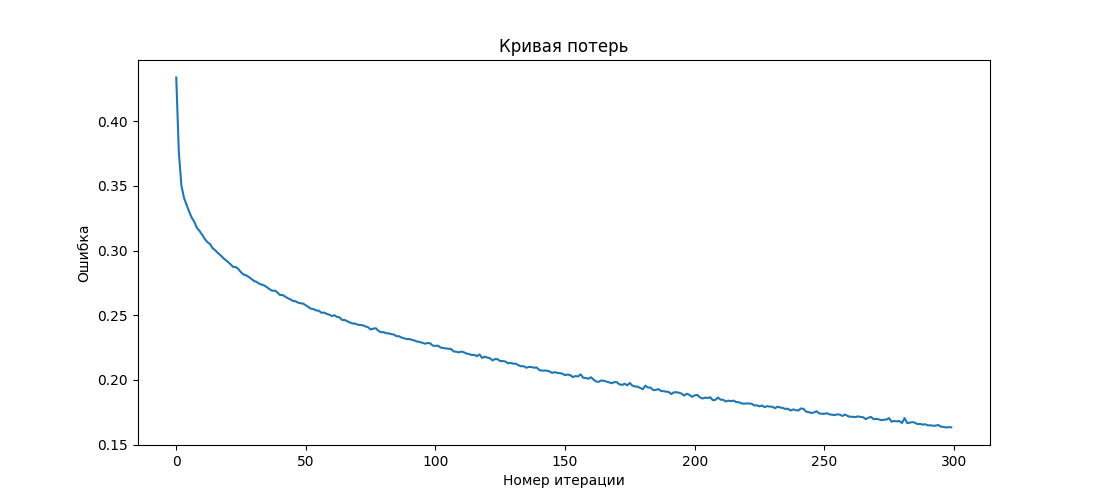

In [10]:
fig, ax = plt.subplots(figsize=(11, 5))
loss_values = mlp_model.loss_curve_

ax.plot(loss_values)
ax.set_title('Кривая потерь')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Ошибка')

In [11]:
mlp_model = MLPClassifier(tol=1e-4, max_iter=300, hidden_layer_sizes=(200,), random_state=444)
mlp_model.fit(X_train, y_train)

C:\Dev\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200,), max_iter=300, random_state=444)

In [12]:
y_pred = mlp_model.predict(X_test)
cr = classification_report(y_test, y_pred, digits=7)
print(cr)

              precision    recall  f1-score   support

         0.0  0.8912615 0.9114645 0.9012498      8426
         1.0  0.4502579 0.3947028 0.4206540      1548

    accuracy                      0.8312613      9974
   macro avg  0.6707597 0.6530837 0.6609519      9974
weighted avg  0.8228162 0.8312613 0.8266596      9974



Text(0, 0.5, 'Ошибка')

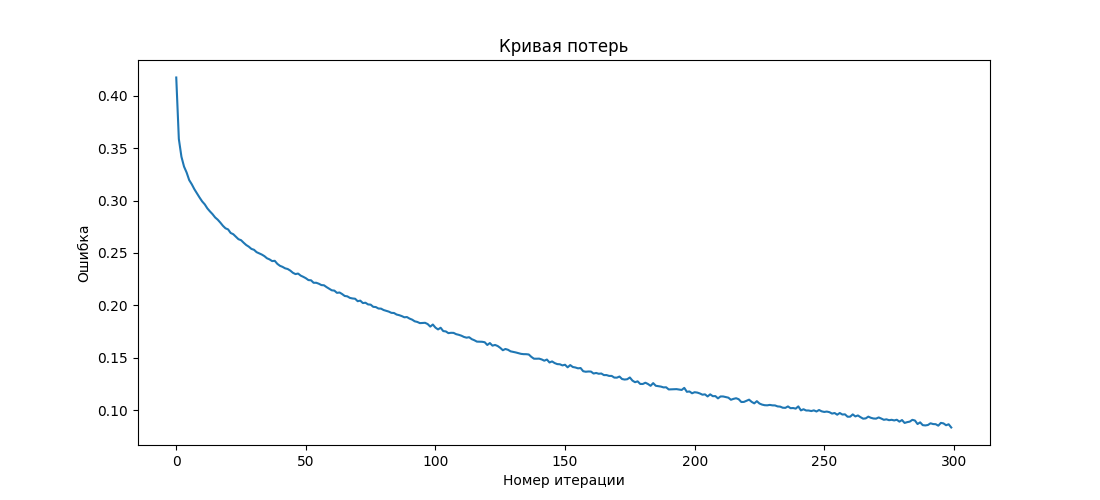

In [13]:
fig, ax = plt.subplots(figsize=(11, 5))
loss_values = mlp_model.loss_curve_
ax.plot(loss_values)
ax.set_title('Кривая потерь')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Ошибка')

In [14]:
mlp_model = MLPClassifier(tol=1e-4, max_iter=300, hidden_layer_sizes=(100,), activation='logistic', random_state=444)
mlp_model.fit(X_train, y_train)

C:\Dev\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=300, random_state=444)

In [15]:
y_pred = mlp_model.predict(X_test)
cr = classification_report(y_test, y_pred, digits=7)
print(cr)

              precision    recall  f1-score   support

         0.0  0.8892412 0.9652267 0.9256772      8426
         1.0  0.6461353 0.3456072 0.4503367      1548

    accuracy                      0.8690596      9974
   macro avg  0.7676882 0.6554170 0.6880070      9974
weighted avg  0.8515103 0.8690596 0.8519027      9974



Text(0, 0.5, 'Ошибка')

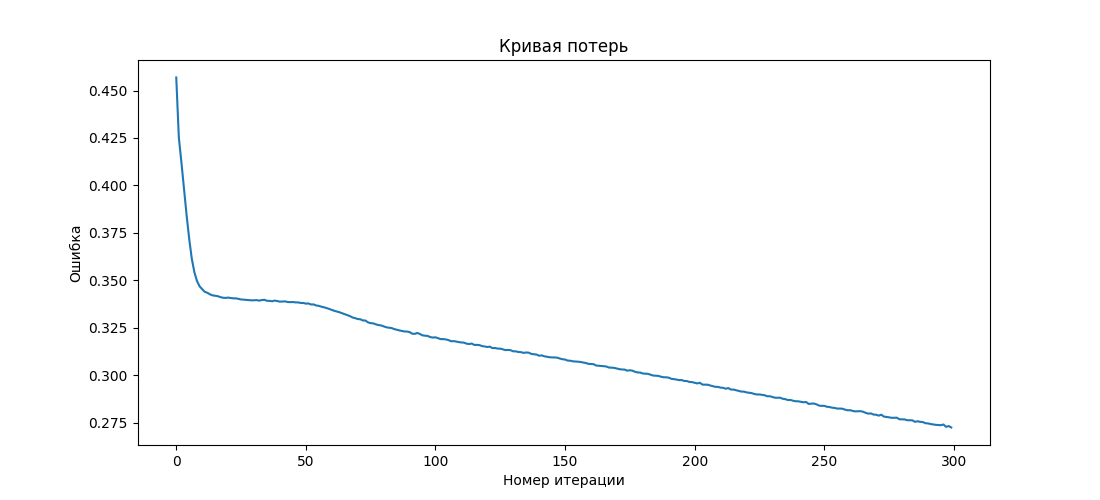

In [16]:
fig, ax = plt.subplots(figsize=(11, 5))
loss_values = mlp_model.loss_curve_
ax.plot(loss_values)
ax.set_title('Кривая потерь')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Ошибка')

In [17]:
mlp_model = MLPClassifier(tol=1e-4, max_iter=300, hidden_layer_sizes=(100,), activation='logistic', early_stopping=True, random_state=444)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True, max_iter=300,
              random_state=444)

In [18]:
y_pred = mlp_model.predict(X_test)
cr = classification_report(y_test, y_pred, digits=7)
print(cr)

              precision    recall  f1-score   support

         0.0  0.8853621 0.9633278 0.9227009      8426
         1.0  0.6166253 0.3210594 0.4222600      1548

    accuracy                      0.8636455      9974
   macro avg  0.7509937 0.6421936 0.6724805      9974
weighted avg  0.8436532 0.8636455 0.8450307      9974



Text(0, 0.5, 'Ошибка')

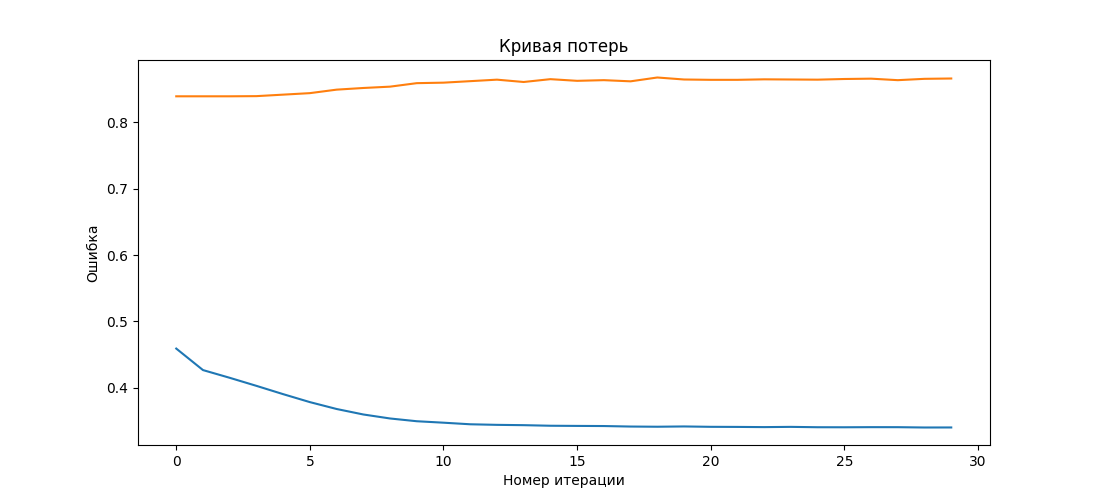

In [19]:
fig, ax = plt.subplots(figsize=(11, 5))
loss_values = mlp_model.loss_curve_
val_scores = mlp_model.validation_scores_
ax.plot(loss_values)
ax.plot(val_scores)
ax.set_title('Кривая потерь')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Ошибка')

In [20]:
mlp_model.n_iter_

30